In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import plotly.express as px
# https://www.python-graph-gallery.com/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html


import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.manifold import MDS
import umap.umap_ as umap



df = pd.read_csv("https://databeauty.com/data/EconomistData.csv")
df

,Unnamed: 0,Country,HDI.Rank,HDI,CPI,Region
0,1,Afghanistan,172,0.398,1.5,Asia Pacific
1,2,Albania,70,0.739,3.1,East EU Cemt Asia
2,3,Algeria,96,0.698,2.9,MENA
3,4,Angola,148,0.486,2.0,SSA
4,5,Argentina,45,0.797,3.0,Americas
...,...,...,...,...,...,...
168,169,Vanuatu,125,0.617,3.5,Asia Pacific
169,170,Venezuela,73,0.735,1.9,Americas
170,171,Yemen,154,0.462,2.1,MENA
171,172,Zambia,164,0.430,3.2,SSA


0      #1b9e77
1      #d95f02
2      #7570b3
3      #e7298a
4      #66a61e
        ...   
168    #1b9e77
169    #66a61e
170    #7570b3
171    #e7298a
172    #e7298a
Name: color, Length: 173, dtype: object


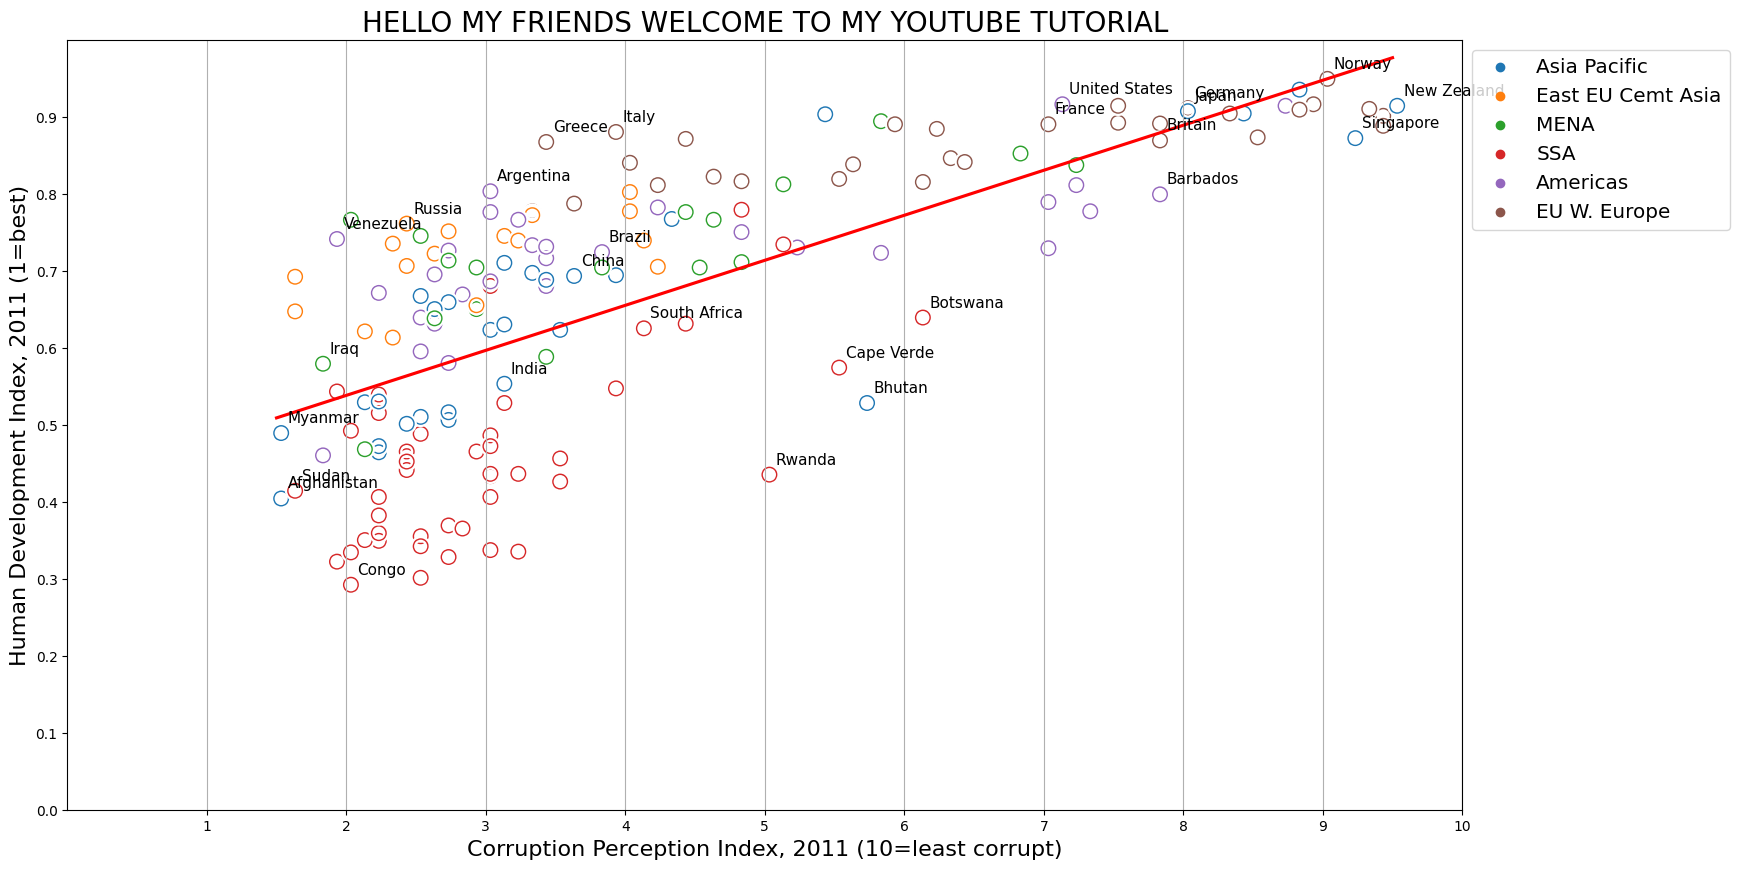

In [60]:
pointsToLabel = ["Russia", "Venezuela", "Iraq", "Myanmar",
"Sudan", "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
"India", "Italy", "China", "South Africa", "Spane", "Botswana",
"Cape Verde", "Bhutan", "Rwanda", "France", "United States",
"Germany", "Britain", "Barbados", "Norway", "Japan", "New Zealand",
"Singapore"]

#sns.set_style("whitegrid")

#df["label"] = df.index


color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
df["color"] = df["Region"]
regions = ['Asia Pacific', 'East EU Cemt Asia', 'MENA', 'SSA', 'Americas', 'EU W. Europe']

for i, reg in enumerate(df["Region"]):
    df.color[i] = color_list[regions.index(reg)]

print(df.color)


fig = plt.figure(figsize=(18,10))

#ax = sns.scatterplot(x="CPI", y="HDI", data=df, label=df.label, legend=False, color=df.color)


sns.scatterplot(x = "CPI", y = "HDI", data = df, hue="Region", color=color_list, s=400, marker="$\circ$"
               )

ax = sns.regplot(x = "CPI", y = "HDI", data = df,
                 ci=0, #confidence interval
                 logistic=False,
                 #scatter_kws={"s":30},
                 color="red",
                 scatter=False
                )


ax.grid(axis='x')

for i,country in enumerate(df.Country):
    if country in pointsToLabel:
        plt.text(df.CPI[i]+0.08, df.HDI[i] + 0.02, country, fontsize=11.0)
        
plt.ylim(0, 1)
plt.xlim(0,10)

plt.xticks(range(1,11))
plt.yticks(np.arange(start=0, stop=1, step=0.1))

        
plt.xlabel("Corruption Perception Index, 2011 (10=least corrupt)", fontsize=16.0)
plt.ylabel("Human Development Index, 2011 (1=best)", fontsize=16.0)
plt.title("HELLO MY FRIENDS WELCOME TO MY YOUTUBE TUTORIAL", fontsize=20.0)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='x-large')

#ax.set(xlabel="Corruprion Perception Index, 2011 (10=least corrupt)", ylabel='common ylabel')
    
plt.show()

In [133]:
df = pd.read_csv("datasets/sankey.csv")
# FROM TO VALUE (43,3)
df

# can links ONLY contain integer sources/target identifiers???
# YES!
# i have to convert country names to int ids

source = df.FROM.values.tolist()
target = df.TO.values.tolist()
values = df.VALUE.values.tolist()

translator = list(set(source).union(set(target)))

for i, name in enumerate(source):
    source[i] = translator.index(name)

for i, name in enumerate(target):
    target[i] = translator.index(name)
    
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
color_link = list()
for i, _ in enumerate(source):
    color_link.append( colors[source[i] % len(colors) ] )
    
color_node = list()
for i,_ in enumerate(translator) :
    color_node.append( colors[ i % len(colors) ] )


link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label = translator, pad=35, thickness=20, color = color_node)

data = go.Sankey(link=link, node=node)
fig = go.Figure(data)
fig.update_layout(
    hovermode='x',
    title='Sankey 5 - 40 nodes, 40 targets',
    font=dict(size=10, color='white'),
    paper_bgcolor='#51504f')
fig.show()


